In [1]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)

In [2]:
#t = uproot.lazy("/eos/user/d/dvalsecc/ECAL/ECALTpgParam.root")
t = uproot.lazy("EcalTPGParam.root")

In [3]:
t.fields

['fed',
 'tcc',
 'tower',
 'stripInTower',
 'xtalInStrip',
 'CCU',
 'VFE',
 'xtalInVFE',
 'xtalInCCU',
 'ieta',
 'iphi',
 'ix',
 'iy',
 'iz',
 'hashedId',
 'ic',
 'cmsswId',
 'dbId',
 'ietaTT',
 'iphiTT',
 'TCCch',
 'TCCslot',
 'SLBch',
 'SLBslot',
 'ietaGCT',
 'iphiGCT',
 'det',
 'crate']

In [4]:
fed = t.fed
CCU = t.CCU
EEp = t.iz == 1
EEm = t.iz == -1
EB = t.iz == 0

In [5]:
#mask_bad_EE = ( (fed==650) & ((CCU<7) | ((CCU>=9) & (CCU<=11))) | ((fed==649) & ((CCU>=17) & (CCU<=32))))
# new version after partial recovery below:
mask_bad_EE = ( (fed==650) & ((CCU<7)) | ((fed==649) & ((CCU>=17) & (CCU<=30))))

In [6]:
t[fed==650].iz

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='791 * int32'>

In [7]:
with open("Cmsswid_EEplus.txt", "w") as w:
    for i in t.cmsswId[mask_bad_EE]:
        w.write(f"{i}\n")

In [8]:
t[EEm].fed

<Array [610, 610, 610, 610, ... 601, 601, 601] type='37924 * int32'>

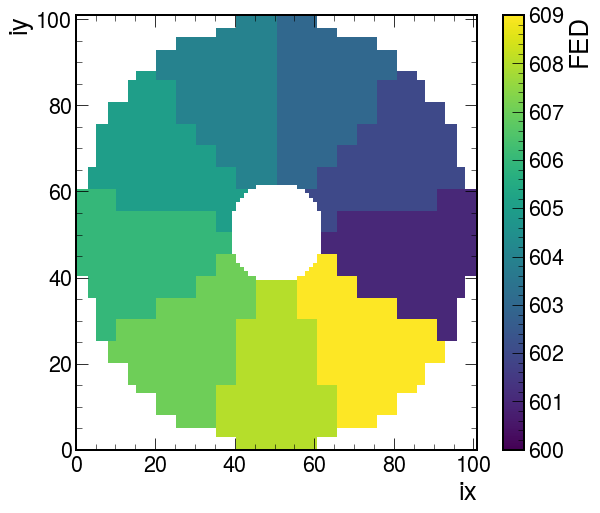

In [9]:
f = plt.figure(figsize=(9,8), dpi=72)

plt.hist2d(t[EEp].ix, t[EEm].iy, bins=100, weights=t[EEm].fed, range=((0,101),(0,101)), vmin=600, cmin=1)
plt.xlabel("ix")
plt.ylabel("iy")
plt.colorbar(label="FED")

len(ybins)-1 =  100


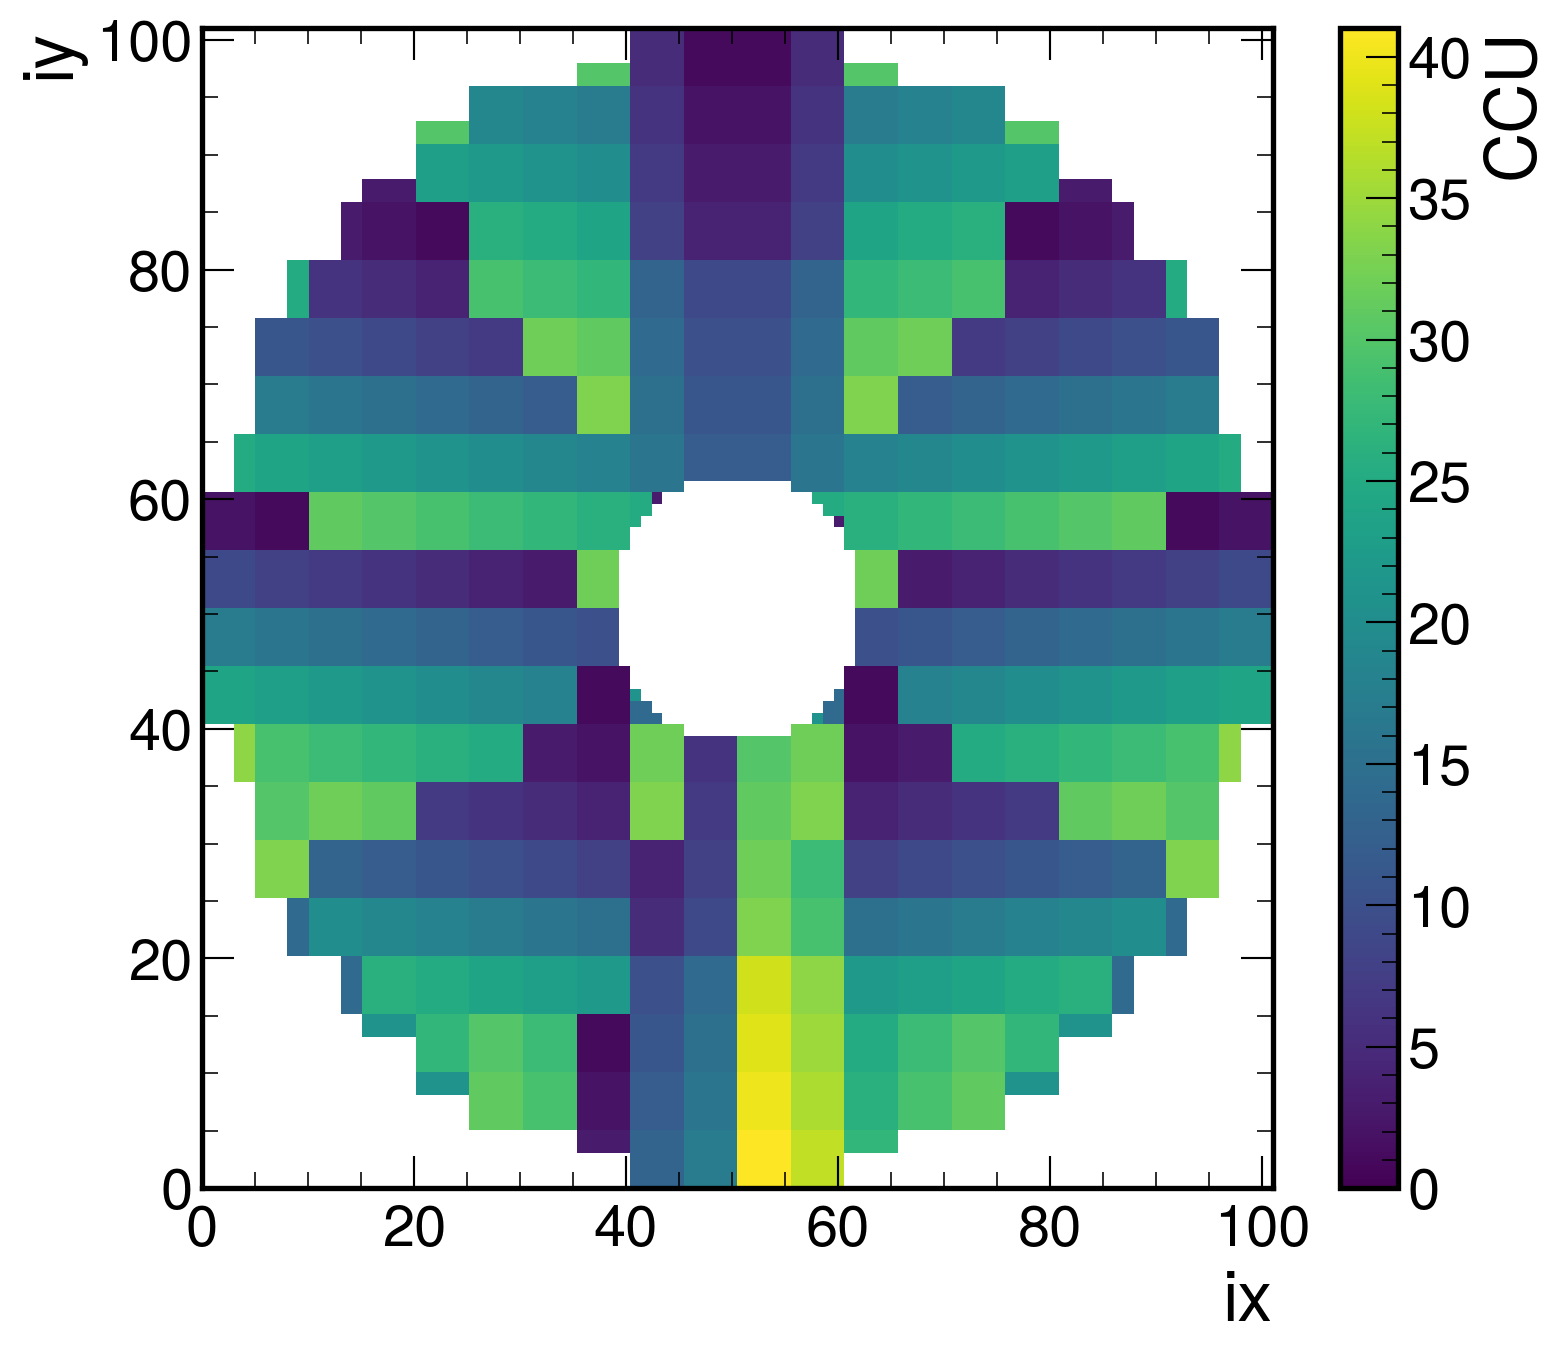

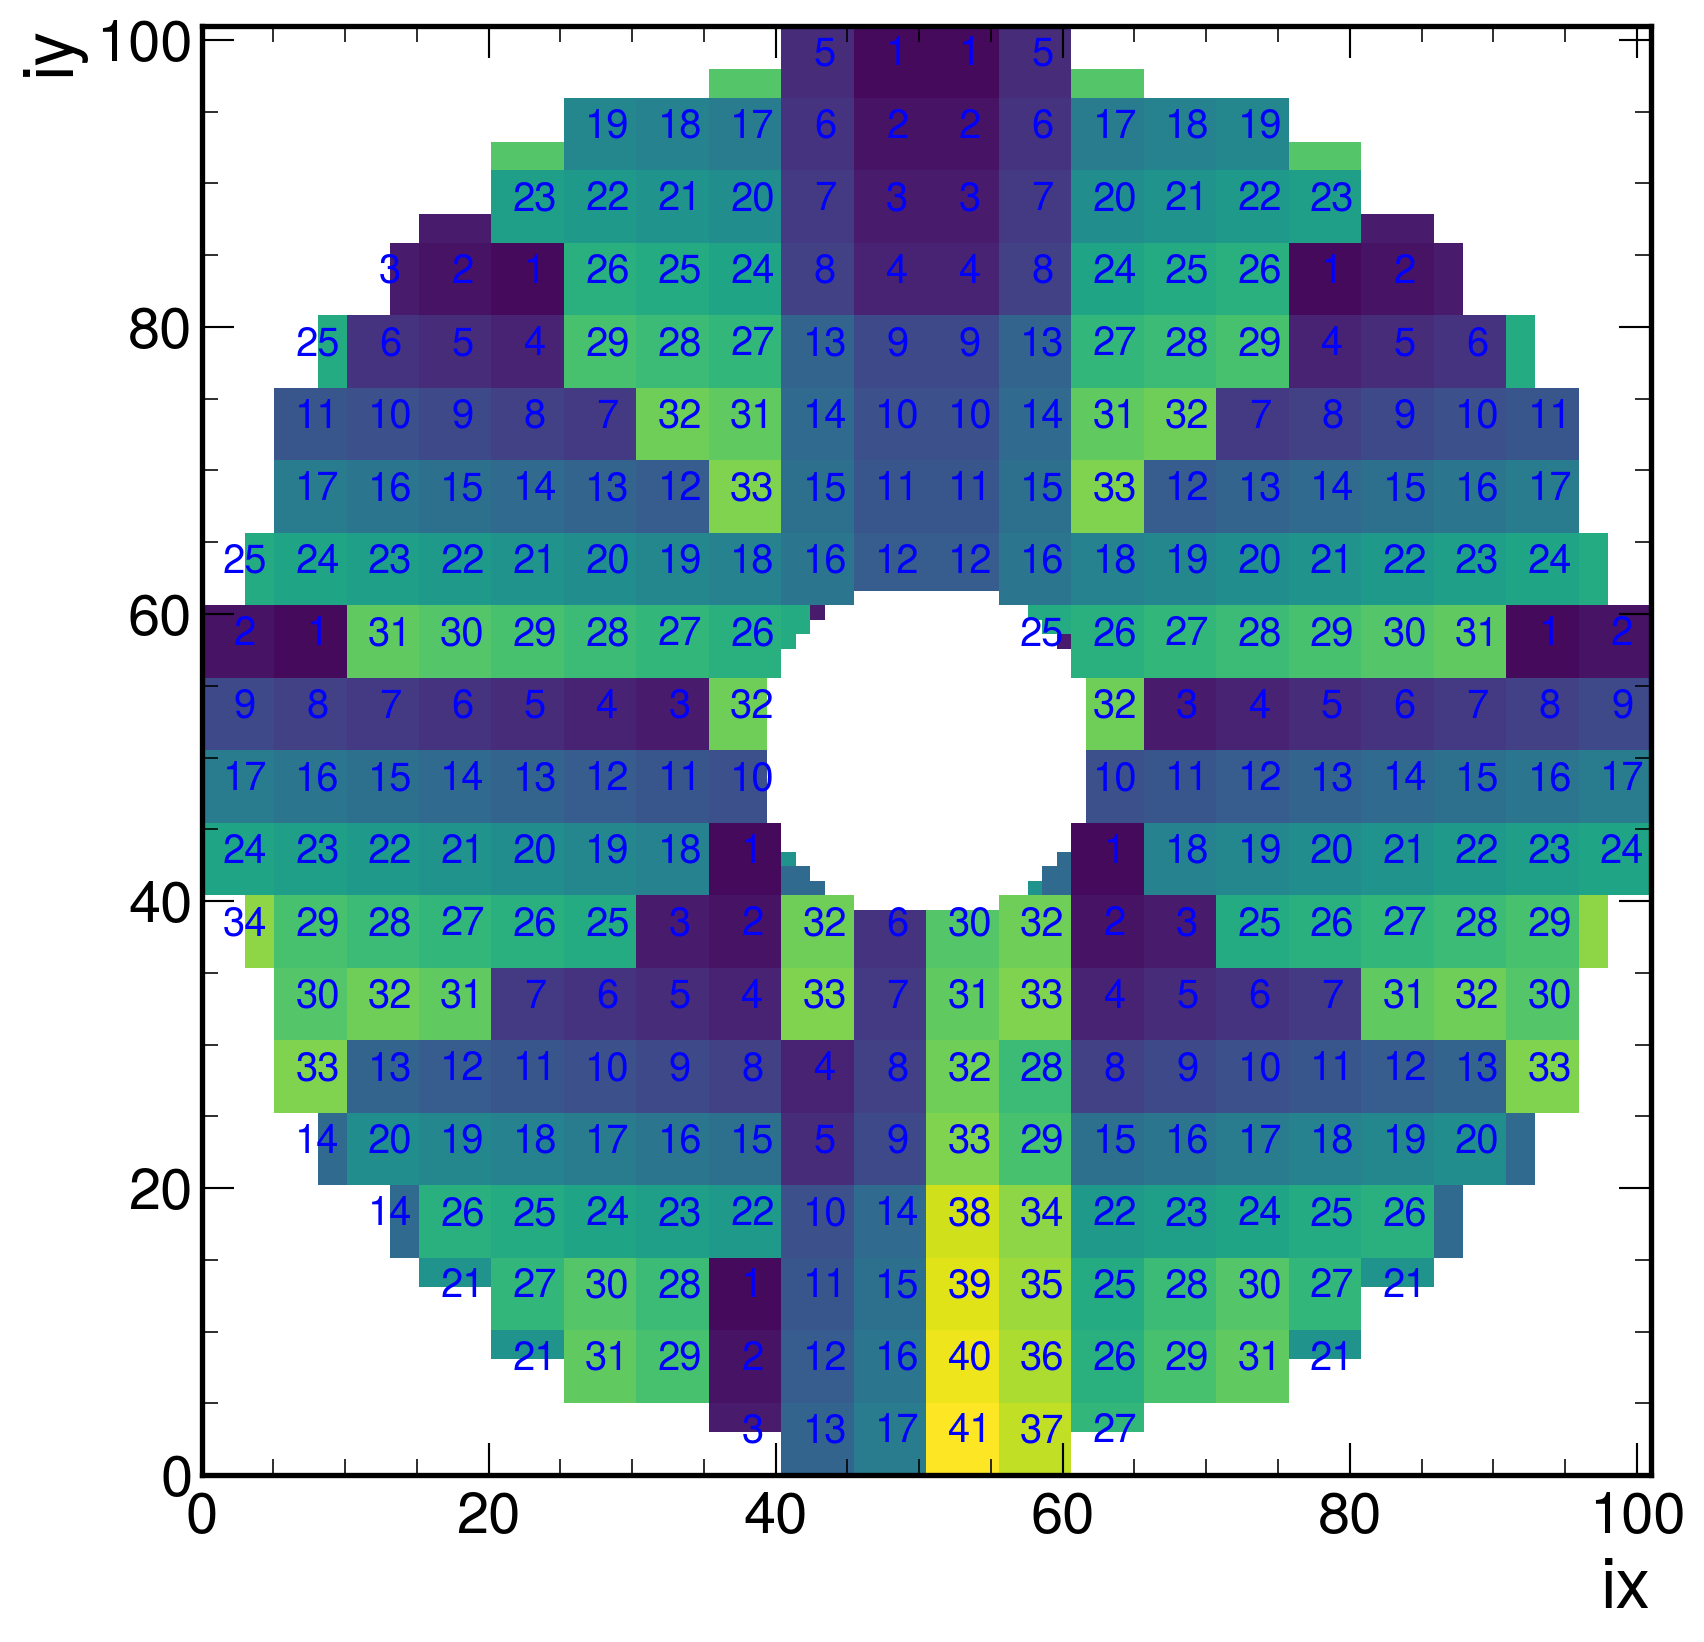

In [10]:
f = plt.figure(figsize=(9,8), dpi=192)

plt.hist2d(t[EEp].ix, t[EEm].iy, bins=100, weights=t[EEm].CCU, range=((0,101),(0,101)), vmin=0, cmin=1)
plt.xlabel("ix")
plt.ylabel("iy")
plt.colorbar(label="CCU")



fig, ax = plt.subplots(dpi=192)
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(t[EEp].ix, t[EEm].iy, bins=100, weights=t[EEm].CCU, range=((0,101),(0,101)), vmin=0, cmin=1)

print ("len(ybins)-1 = ", len(ybins)-1)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
#        ax.text(xbins[j]+0.5,ybins[i]+0.5, hist.T[i,j], color="w", ha="center", va="center", fontweight="bold")     
#        if (hist.T[i,j]>0 and xbins[j]<2 and ybins[i]<70) : ax.text(xbins[j],ybins[i], int(hist.T[i,j]), color="b", ha="center", va="center",
#       if (hist.T[i,j]>0 and xbins[j]<2 and ybins[i]<70) : ax.text(xbins[j],ybins[i], "ciao", color="b", ha="center", va="center",
        if (hist.T[i,j]>0  and xbins[j]<100 and not((j+2)%5) and not((i+2)%5)) : ax.text(xbins[j],ybins[i], int(hist.T[i,j]), color="b", ha="center", va="center",
                                     #fontweight="bold",
                                     fontsize=15) 
#                                     fontsize="xx-small") 
#        if (hist.T[i,j]>0) : print ("xbins[j],ybins[i], hist.T[i,j] = ", xbins[j],ybins[i], hist.T[i,j])
        
plt.xlabel("ix")
plt.ylabel("iy")
#plt.colorbar(label="CCU")

plt.show()


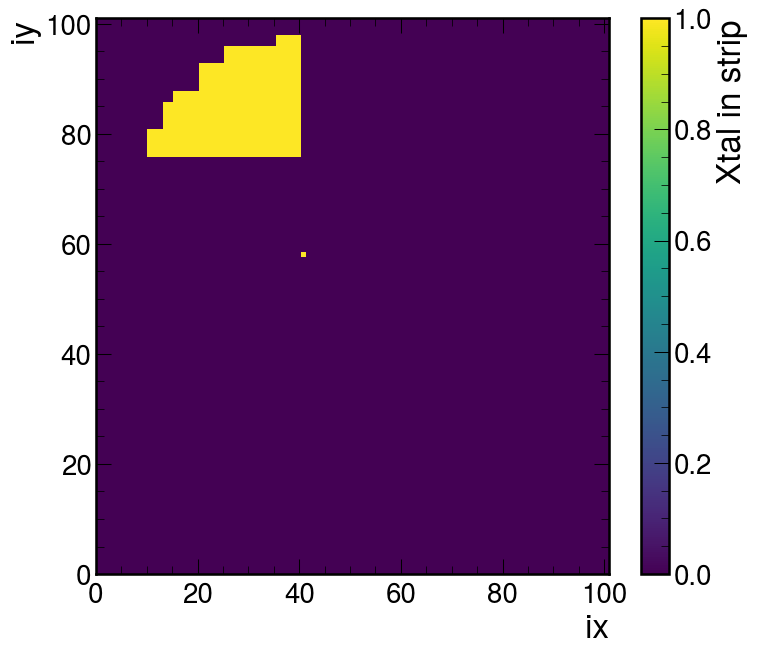

In [11]:
f = plt.figure(figsize=(9,8), dpi=92)
#plt.hist2d(t[EEp].ix, t[EEm].iy, bins=100, weights=t[EEm].xtalInStrip, range=((0,101),(0,101)), cmin=1)

H, binx, biny = np.histogram2d(t[mask_bad_EE].ix, t[mask_bad_EE].iy, bins=100, range=((0,101),(0,101)))
plt.pcolormesh(binx, biny, H.T, vmin=0)

plt.xlabel("ix")
plt.ylabel("iy")
plt.colorbar(label="Xtal in strip")

In [12]:
ak.ones_like(mask_bad_EE)   # useless ---> so far

<Array [True, True, True, ... True, True, True] type='75848 * bool'>

# Rechits analysis

In [13]:
input="/eos/cms/store/group/dpg_ecal/alca_ecalcalib/bmarzocc/ECAL_Recovery_2022/TEST/JetMET_Run2022D-JetHTJetPlusHOFilter-PromptReco-v2_RAW-RECO/*.root"

In [14]:
df = uproot.lazy(input)

In [15]:
df.type

3058 * {"eventId": int64, "lumiId": int32, "runId": int32, "rho": float32, "nVtx": int32, "ecalRecHit_rawId": var * uint32, "ecalRecHit_chStatus": var * int32, "ecalRecHit_energy": var * float32, "ecalRecHit_eta": var * float32, "ecalRecHit_phi": var * float32, "ecalRecHit_ix": var * int32, "ecalRecHit_iy": var * int32, "ecalRecHit_iz": var * int32, "matchedHcalRecHit_rawId": var * var * int64, "matchedHcalRecHit_energy": var * var * float64, "matchedHcalRecHit_eta": var * var * float64, "matchedHcalRecHit_phi": var * var * float64, "matchedHcalRecHit_ieta": var * var * int64, "matchedHcalRecHit_iphi": var * var * int64, "matchedHcalRecHit_iz": var * var * int64, "matchedHcalRecHit_depth": var * var * int64, "matchedESRecHit_rawId": var * var * int64, "matchedESRecHit_energy": var * var * float64, "matchedESRecHit_eta": var * var * float64, "matchedESRecHit_phi": var * var * float64, "matchedESRecHit_ix": var * var * int64, "matchedESRecHit_iy": var * var * int64, "matchedESRecHit_iz":

In [16]:
df.ecalRecHit_eta[0]

<Array [1.57, 1.56, 1.62, ... 2.08, 1.58, 2.13] type='10 * float32'>

In [17]:
eta = df.ecalRecHit_eta[0]
phi = df.ecalRecHit_phi[0]
ix  = df.ecalRecHit_ix[0]
iy  = df.ecalRecHit_iy[0]
en  = df.ecalRecHit_energy[0]

etaEs = df.matchedESRecHit_eta[0]
phiEs = df.matchedESRecHit_phi[0]
ixEs  = df.matchedESRecHit_ix[0,:]
iyEs  = df.matchedESRecHit_iy[0,:]
enEs  = df.matchedESRecHit_energy[0]

etaHCAL  = df.matchedHcalRecHit_eta[0]
phiHCAL  = df.matchedHcalRecHit_phi[0]
ietaHCAL = df.matchedHcalRecHit_ieta[0,:]
iphiHCAL = df.matchedHcalRecHit_iphi[0,:]
izHCAL   = df.matchedHcalRecHit_iz[0,:]
enHCAL   = df.matchedHcalRecHit_energy[0]

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

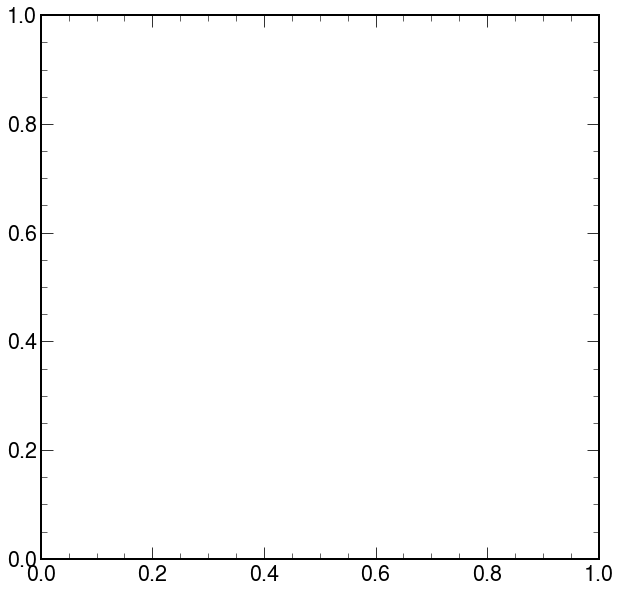

In [18]:
plt.hist(ak.flatten(df.matchedHcalRecHit_ieta))

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30,8), dpi=72)

H, binx, biny, I= ax1.hist2d(ak.flatten(ixEs), ak.flatten(iyEs), weights=ak.flatten(enEs),range=((0,20),(20,40)), bins=20, cmin=1e-6)
plt.colorbar(I, ax=ax1)

H, binx, biny, I= ax2.hist2d(ix, iy, weights=en,range=((0,50),(50,100)), bins=50, cmin=1e-6)
plt.colorbar(I, ax=ax2)


In [12]:
phi

<Array [1.57, 1.56, 1.62, ... 2.08, 1.58, 2.13] type='10 * float32'>